## Imports

In [26]:
# this is a hack to have pylance working with tensorflow and keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
keras = tf.keras

## Load the internal MNIST data 

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Get some information

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


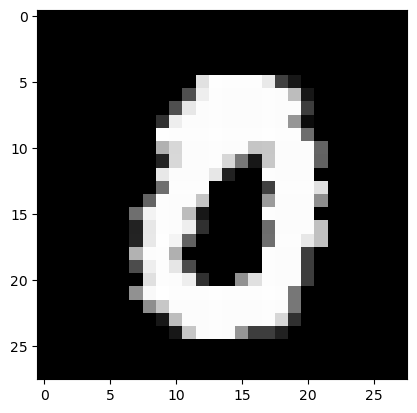

In [39]:
plt.imshow(x_train[69], cmap='Greys_r')

## Turn into a binary classification problem
We only want to check whether the image we see is a 1 or not

In [18]:
y_train_bool = y_train == 1
y_test_bool = y_test == 1

In [20]:
y_test_bool

array([False, False,  True, ..., False, False, False])

## Scale x data

In [22]:
np.max(x_train)

255

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_test_scaled

## Built the model

In [29]:
model = keras.models.Sequential()
model.add(
    keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        input_shape=(28, 28, 1),
    ),
)
model.add(
    keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
    ),
)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train_scaled, y_train_bool, epochs=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 43264)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 43265     
                                                                 
Total params: 62,081
Trainable params: 62,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 2/2
1875/1875 [==============================] - 20s 11ms/step - loss: 0.

## Evaluate the model

In [30]:
# Get training data accuracy
model.evaluate(x_train_scaled, y_train_bool)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0061 - accuracy: 0.9980


[0.006130312103778124, 0.9980000257492065]

In [41]:
# Get testing data accuracy
model.evaluate(x_test_scaled, y_test_bool)

313/313 [==============================] - 2s 5ms/step - loss: 0.0064 - accuracy: 0.9978


[0.006372577976435423, 0.9977999925613403]

## Conclusion
...